# Los peces y el mercurio
### Yoceline Aralí Mata A01562116

Se llevó a cabo un estudio en 53 lagos de Florida con el fin de examinar los factores que influyen en el nivel de contaminación de mercurio, ya que este tipo de contaminación es una amenaza directa contra la salud. A continuación se realiza un análisis de los datos para conocer los principales factores que influyen en el nivel de contaminación.

In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## 2. Explora las variables y familiarízate con su significado 
1. Identifica la cantidad de datos y variables presentes.
2. Clasifica las variables de acuerdo a su tipo y escala de medición.


In [133]:
columns_name = ["nombre_lago", "alcalinidad", "ph", "calcio", "clorofila", "conc_mercurio", "num_peces", "min_conc_peces", "max_conc_peces", "estim_conc", "edad"]
data = pd.read_csv("mercurio.csv", index_col = "X1")
data.columns = columns_name

In [135]:
data.head()

,nombre_lago,alcalinidad,ph,calcio,clorofila,conc_mercurio,num_peces,min_conc_peces,max_conc_peces,estim_conc,edad
X1,,,,,,,,,,,
1,Alligator,5.9,6.1,3.0,0.7,1.23,5,0.85,1.43,1.53,1
2,Annie,3.5,5.1,1.9,3.2,1.33,7,0.92,1.90,1.33,0
3,Apopka,116.0,9.1,44.1,128.3,0.04,6,0.04,0.06,0.04,0
4,Blue Cypress,39.4,6.9,16.4,3.5,0.44,12,0.13,0.84,0.44,0
5,Brick,2.5,4.6,2.9,1.8,1.20,12,0.69,1.50,1.33,1


In [136]:
data.tail()

,nombre_lago,alcalinidad,ph,calcio,clorofila,conc_mercurio,num_peces,min_conc_peces,max_conc_peces,estim_conc,edad
X1,,,,,,,,,,,
48,Trout,1.2,4.3,2.1,6.4,0.94,10,0.59,1.24,0.98,1
49,Tsala Apopka,34.0,7.0,13.1,4.6,0.40,12,0.08,0.90,0.31,1
50,Weir,15.5,6.9,5.2,16.5,0.43,11,0.23,0.69,0.43,1
52,Wildcat,17.3,5.2,3.0,2.6,0.25,12,0.15,0.40,0.28,1
53,Yale,71.8,7.9,20.5,8.8,0.27,12,0.15,0.51,0.25,1


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 53
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre_lago     53 non-null     object 
 1   alcalinidad     53 non-null     float64
 2   ph              53 non-null     float64
 3   calcio          53 non-null     float64
 4   clorofila       53 non-null     float64
 5   conc_mercurio   53 non-null     float64
 6   num_peces       53 non-null     int64  
 7   min_conc_peces  53 non-null     float64
 8   max_conc_peces  53 non-null     float64
 9   estim_conc      53 non-null     float64
 10  edad            53 non-null     int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 5.0+ KB


**Tipo de variables y escala de medición**

Datos categóricos/cualitativos

* Escala nominal: nombre_lago, edad 

Datos numéricos/cuantitativos

* Escala de razón: alcalinidad, ph, calcio, clorofila, conc_mercurio, num_peces, min_concentracion_peces, max_concentracion_peces,estimacion_concentracion


In [138]:
cuantitativas = ["alcalinidad", "ph", "calcio", "clorofila", "conc_mercurio", "num_peces", "min_conc_peces", "max_conc_peces","estim_conc"]
cualitativas = ["nombre_lago", "edad"]

## 1. Exploración de la base de datos

### 1. Calcula medidas estadísticas

#### Variables cuantitativas

* Medidas de tendencia central

* Medidas de dispersión

In [139]:
data[cuantitativas].describe()

,alcalinidad,ph,calcio,clorofila,conc_mercurio,num_peces,min_conc_peces,max_conc_peces,estim_conc
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,37.530189,6.590566,22.201887,23.116981,0.527170,13.056604,0.279811,0.874528,0.513208
std,38.203527,1.288449,24.932574,30.816321,0.341036,8.560677,0.226406,0.522047,0.338729
min,1.200000,3.600000,1.100000,0.700000,0.040000,4.000000,0.040000,0.060000,0.040000
25%,6.600000,5.800000,3.300000,4.600000,0.270000,10.000000,0.090000,0.480000,0.250000
50%,19.600000,6.800000,12.600000,12.800000,0.480000,12.000000,0.250000,0.840000,0.450000
75%,66.500000,7.400000,35.600000,24.700000,0.770000,12.000000,0.330000,1.330000,0.700000
max,128.000000,9.100000,90.700000,152.400000,1.330000,44.000000,0.920000,2.040000,1.530000


In [140]:
data[cuantitativas].var()

alcalinidad       1459.509456
ph                   1.660102
calcio             621.633266
clorofila          949.645668
conc_mercurio        0.116305
num_peces           73.285196
min_conc_peces       0.051260
max_conc_peces       0.272533
estim_conc           0.114738
dtype: float64

In [141]:
data[cuantitativas].mode()

,alcalinidad,ph,calcio,clorofila,conc_mercurio,num_peces,min_conc_peces,max_conc_peces,estim_conc
0,17.3,5.8,3.0,1.6,0.34,12.0,0.04,0.06,0.16
1,25.4,6.9,3.3,3.2,NaN,NaN,NaN,0.26,NaN
2,NaN,NaN,5.2,9.6,NaN,NaN,NaN,0.40,NaN
3,NaN,NaN,6.3,NaN,NaN,NaN,NaN,0.48,NaN
4,NaN,NaN,20.5,NaN,NaN,NaN,NaN,0.69,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.40,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.50,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.90,NaN


####  Variables cualitativas
* Tabla de distribución de frecuencia

In [142]:
pd.crosstab(data["nombre_lago"], 'frequency')

col_0,frequency
nombre_lago,
Alligator,1
Annie,1
Apopka,1
Blue Cypress,1
Brick,1
Bryant,1
Cherry,1
Crescent,1
Deer Point,1


In [143]:
pd.crosstab(data["edad"], 'frequency')

col_0,frequency
edad,
0,10
1,43


* Moda


In [144]:
data[cualitativas].mode()

,nombre_lago,edad
0,Alligator,1.0
1,Annie,NaN
2,Apopka,NaN
3,Blue Cypress,NaN
4,Brick,NaN
5,Bryant,NaN
6,Cherry,NaN
7,Crescent,NaN
8,Deer Point,NaN
9,Dias,NaN


* Moda

In [145]:
data[cuantitativas].mode()

,alcalinidad,ph,calcio,clorofila,conc_mercurio,num_peces,min_conc_peces,max_conc_peces,estim_conc
0,17.3,5.8,3.0,1.6,0.34,12.0,0.04,0.06,0.16
1,25.4,6.9,3.3,3.2,NaN,NaN,NaN,0.26,NaN
2,NaN,NaN,5.2,9.6,NaN,NaN,NaN,0.40,NaN
3,NaN,NaN,6.3,NaN,NaN,NaN,NaN,0.48,NaN
4,NaN,NaN,20.5,NaN,NaN,NaN,NaN,0.69,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.40,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.50,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.90,NaN



**Observaciones**

*   La mayoría de los peces son maduros.

*   Todos los registros son de lagos distintos, a excepción de 1, por lo que podría ser que esta variable no sea tan significativa en la concentración media de mercurio en esta muestra, o en caso de ser significativa, la mejor decisión sería no incluirla en el modelo, pues se tendrían que obtener los datos dummys y eso añadiría 51 variables.



### 2. Explora los datos usando herramientas de visualización 

#### Variables cuantitativas
* Medidas de posición

cuantitativas = ["alcalinidad", "ph", "calcio", "clorofila", "conc_mercurio", "num_peces", "min_conc_peces", "max_conc_peces","estim_conc"]
cualitativas = ["nombre_lago", "edad"]

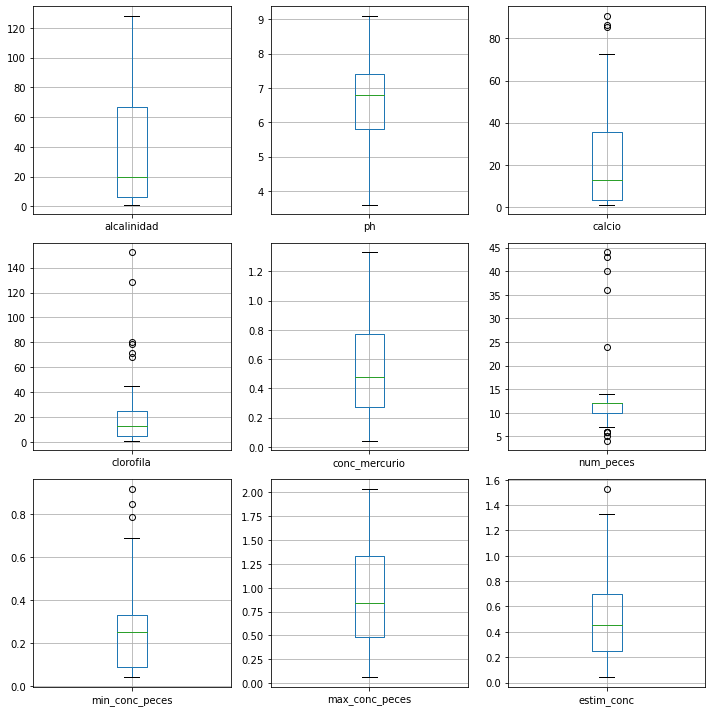

In [146]:

fig, axes = plt.subplots(3,3, figsize=(10, 10))

for i,el in enumerate(cuantitativas):
    a = data.boxplot(el, ax=axes.flatten()[i])

plt.tight_layout() 

plt.show()

"""Como primera observación, se encuentra que las columnas tienen escalas muy distintas, por lo que antes de entrenar cualquier modelo, va a ser necesario hacer un escalamiento de los datos."""

**Observaciones**


*   En la mayoría de las variables los datos no se comportan de manera simétrica.

*   Se observan outliers en las variables calcio, clorofila, número de peces, concentración mínima de mercurio, concentración maxima de mercurio y estimación de la concentración.

* Outliers

A continuación se calcula el número de datos atípicos en cada variable y el valor de estos.

In [147]:
outliers = []
for i,el in enumerate(cuantitativas):
  std_value= data[el].std()
  outliers.append(data.loc[np.abs( (data[el] - data[el].mean()) / data[el].std())  > 3, [el]])
  display(outliers[i])
  print("Cantidad de outliers:")
  display(outliers[i].count())

,alcalinidad
X1,


Cantidad de outliers:


alcalinidad    0
dtype: int64

,ph
X1,


Cantidad de outliers:


ph    0
dtype: int64

,calcio
X1,


Cantidad de outliers:


calcio    0
dtype: int64

,clorofila
X1,
3,128.3
38,152.4


Cantidad de outliers:


clorofila    2
dtype: int64

,conc_mercurio
X1,


Cantidad de outliers:


conc_mercurio    0
dtype: int64

,num_peces
X1,
14,43
17,40
51,44


Cantidad de outliers:


num_peces    3
dtype: int64

,min_conc_peces
X1,


Cantidad de outliers:


min_conc_peces    0
dtype: int64

,max_conc_peces
X1,


Cantidad de outliers:


max_conc_peces    0
dtype: int64

,estim_conc
X1,
1,1.53


Cantidad de outliers:


estim_conc    1
dtype: int64

In [148]:
#std_value= data["num_peces"].std()
#data = data.loc[(data["num_peces"] < 3  * std_value) & (data["num_peces"] > -3 * std_value)]
#data = 
#data.loc[data["num_peces"] != 24].count()

* Histogramas

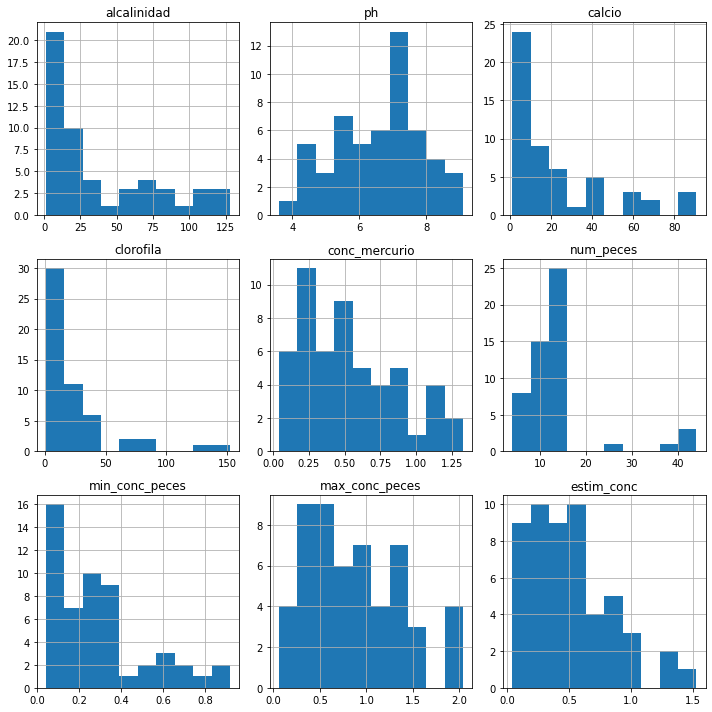

In [149]:
fig, axes = plt.subplots(3,3, figsize=(10, 10))

for i,el in enumerate(cuantitativas):
    a = data.hist(el, ax=axes.flatten()[i])

plt.tight_layout() 


**Comparación de número de peces con concentración de mercurio**

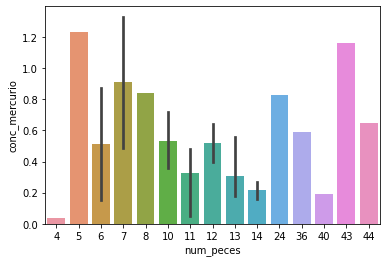

In [150]:
sns.barplot(x = data["num_peces"], y = data["conc_mercurio"])
plt.show()

**Observaciones**

*   La concentración media de mercurio cambia con la cantidad de peces.
*   Parece que la concentración del mercurio comparada con la cantidad peces cambia de forma aleatoria, es decir, no se observa algún patron o tendencia que se siga.



** **texto en negrita**Comparación de alcalinidad con concentración de mercurio**

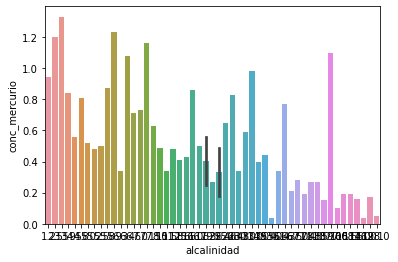

In [151]:
sns.barplot(x = data["alcalinidad"], y = data["conc_mercurio"])
plt.show()

**Observaciones**
* Parece que mientras aumenta el valor de la alcalinidad, la concentración media de mercurio disminuye.

**Comparación de clorofila con concentración de mercurio**

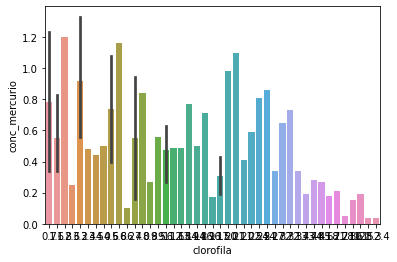

In [152]:
sns.barplot(x = data["clorofila"], y = data["conc_mercurio"])
plt.show()

**Observaciones**
* Se observa que la clorofila se comporta de forma similar a la alcalinidad al relacionarse con la concentración de mercurio, este tipo de relación podría indicar una correlación negativa y que la clorofila y la alcalinidad están correlacionadas.

**Comparación de calcio con concentración de mercurio**

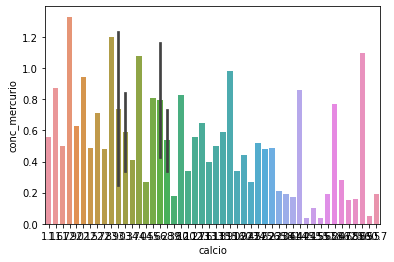

In [153]:
sns.barplot(x = data["calcio"], y = data["conc_mercurio"])
plt.show()

En la relación del calcio con la concentración de mercurio también se observa una tendencia a que la concentración disminuya cuando el valor de la clorofila aumenta, sin embargo esta no está tendencia no es tan notoria como en las variables anteriores.

****

#### Variables categóricas

* Distribución de los datos (diagramas de barras, diagramas de pastel)

**Work_year**

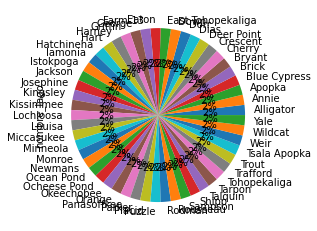

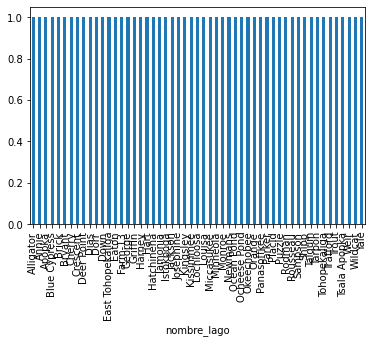

In [154]:
data.groupby(['nombre_lago'])['nombre_lago'].count().plot.pie(y = 'count', autopct='%1.0f%%')
plt.show()
data.groupby(['nombre_lago'])['nombre_lago'].count().plot.bar(y = 'count')
plt.show()

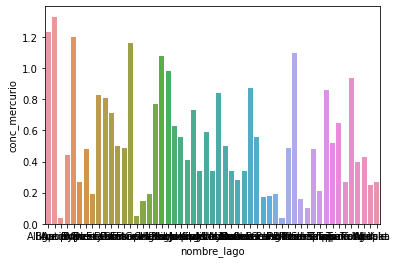

In [155]:
sns.barplot(x = data["nombre_lago"], y = data["conc_mercurio"])
plt.show()

**Observaciones**
* La concentración media de mercurio cambia dependiendo del lago.

**Experience_level**

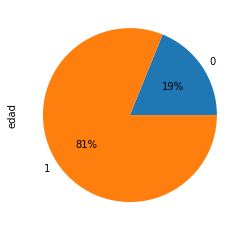

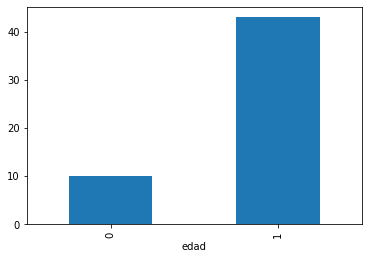

In [156]:
data.groupby(['edad'])['edad'].count().plot.pie(y = 'count', autopct='%1.0f%%')
plt.show()
data.groupby(['edad'])['edad'].count().plot.bar(y = 'count')
plt.show()

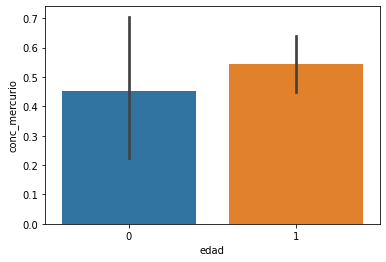

In [157]:
sns.barplot(x = data["edad"], y = data["conc_mercurio"])
plt.show()

**Observaciones**

* La concentración media de mercurio no varia mucho dependiendo de la edad, aun así, parece que hay menos concentración en los peces jovenes.

### 3. Explora la correlación entre las variables. Identifica cuáles son las correlaciones más fuertes y qué sentido tiene relacionarlas.



In [158]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [159]:
%%R
install.packages("MASS")
install.packages("nortest")
install.packages("VGAM") # Yeo jhoson
install.packages("survival")
install.packages("lattice")
install.packages("ggplot2")
install.packages("Hmisc")

'%%R\ninstall.packages("MASS")\ninstall.packages("nortest")\ninstall.packages("VGAM") # Yeo jhoson\ninstall.packages("survival")\ninstall.packages("lattice")\ninstall.packages("ggplot2")\ninstall.packages("Hmisc")'

In [160]:
%%R
library(MASS)
library(nortest)
library(VGAM) # Yeo jhoson

In [161]:
%%R -i data
conc_merc1 = data$conc_merc
alcalinidad1 = data$alcalinidad
ph1 = data$ph
calcio1 = data$calcio
clorofila1 = data$clorofila
num_peces1 = data$num_peces
min_conc = data$min_conc
max_conc = data$max_conc
estim_conc = data$estim_conc
edad1 = data$edad

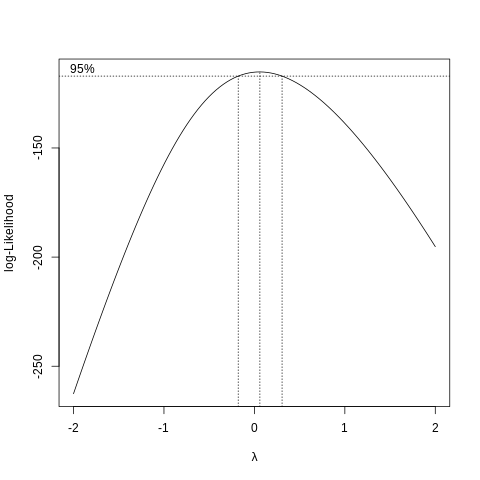

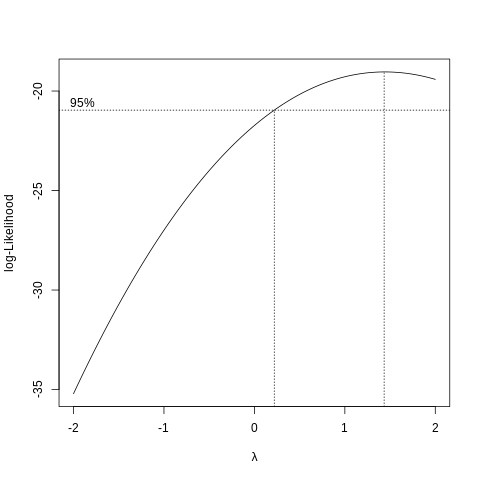

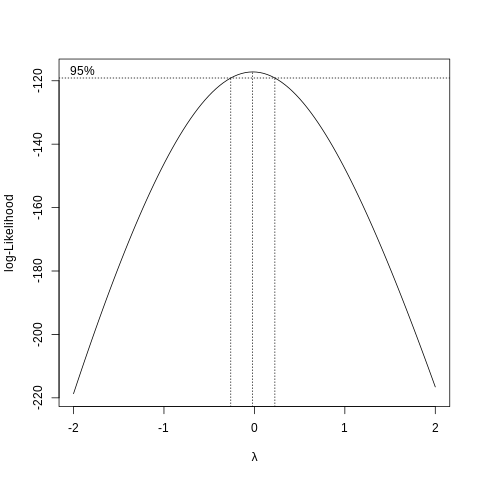

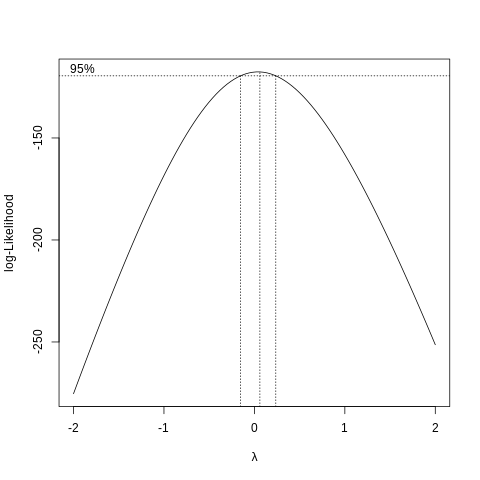

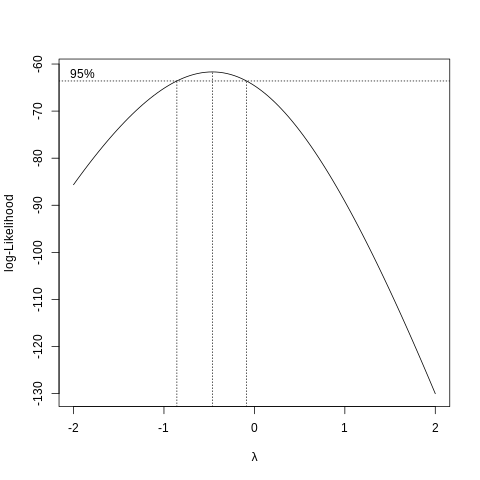

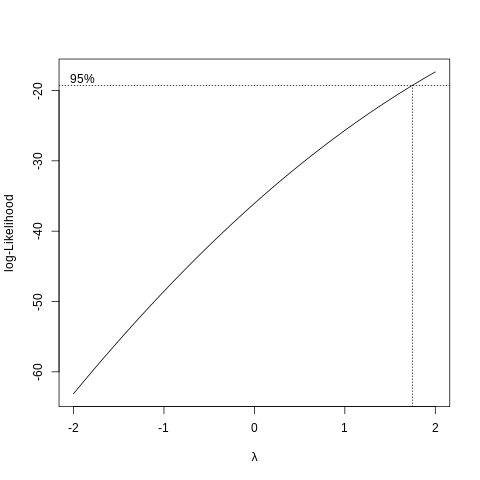

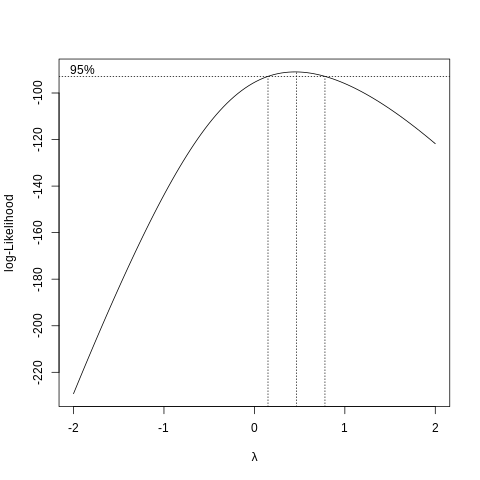

In [162]:
%%R
alcalinidad_box<-boxcox(alcalinidad1~1)
alcalinidadV = alcalinidad_box$x[which.max(alcalinidad_box$y)]

ph_box<-boxcox(ph1~1)
phV = ph_box$x[which.max(ph_box$y)]

calcio_box<-boxcox(calcio1~1)
calcioV = calcio_box$x[which.max(calcio_box$y)]

clorofila_box<-boxcox(clorofila1~1)
clorofilaV = clorofila_box$x[which.max(clorofila_box$y)]

num_peces_box<-boxcox(num_peces1~1)
num_pecesV = num_peces_box$x[which.max(num_peces_box$y)]

edad_box<-boxcox(edad1+1~1)
edadV = edad_box$x[which.max(edad_box$y)]

conc_merc_box<-boxcox(conc_merc1~1)
conc_mercV = conc_merc_box$x[which.max(conc_merc_box$y)]



	Anderson-Darling normality test

data:  alcalinidad
A = 0.87042, p-value = 0.02387



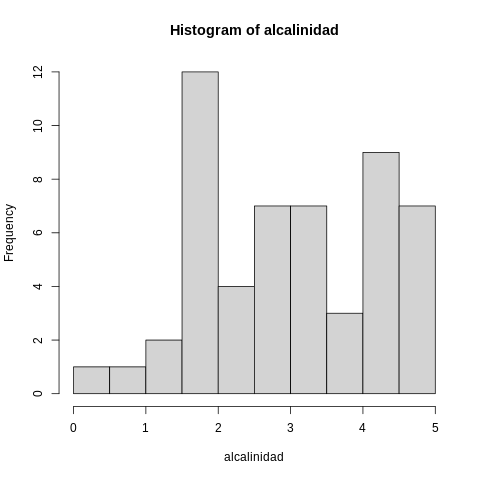

In [164]:
%%R
alcalinidad = log(alcalinidad1)
hist(alcalinidad)
ad.test(alcalinidad)


	Anderson-Darling normality test

data:  ph1
A = 0.34956, p-value = 0.4611



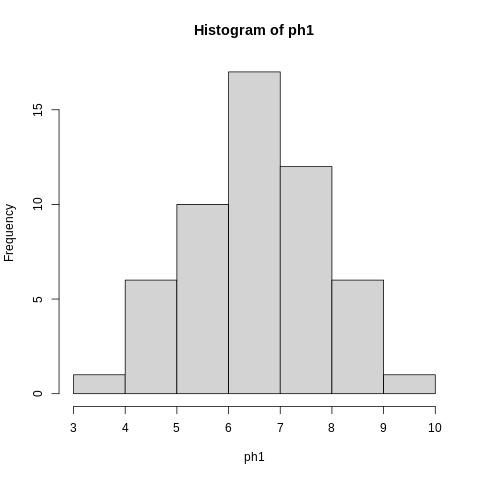

In [165]:
%%R
hist(ph1)
ph = ph1
ad.test(ph1)


	Anderson-Darling normality test

data:  calcio
A = 0.78183, p-value = 0.03976



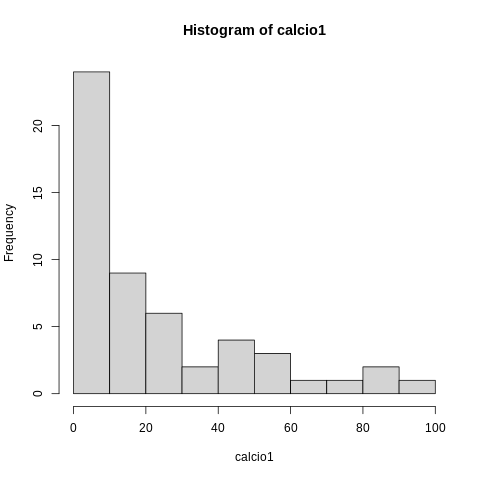

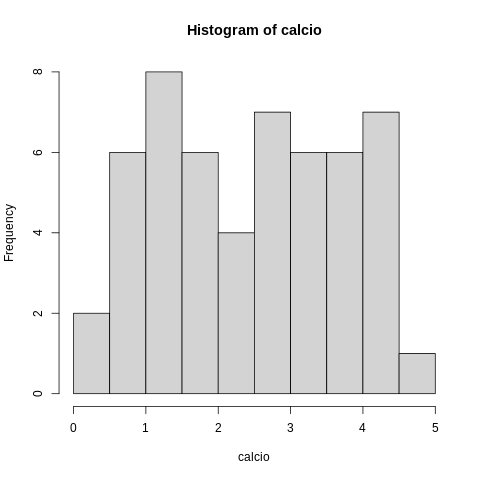

In [166]:
%%R
hist(calcio1) 
calcio = log(calcio1)  
hist(calcio)
ad.test(calcio)

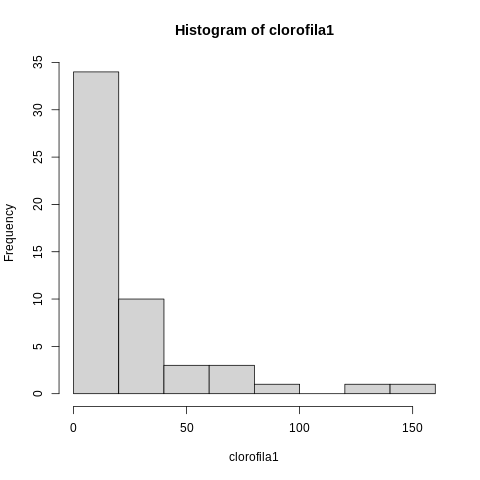

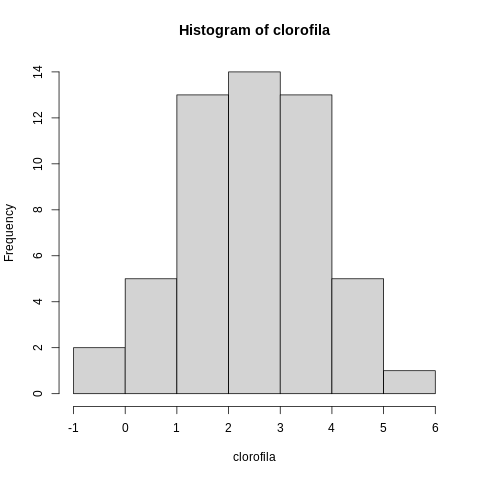

In [167]:
%%R
hist(clorofila1) 
clorofila = log(clorofila1)  
hist(clorofila)


	Anderson-Darling normality test

data:  num_peces
A = 3.6788, p-value = 2.612e-09



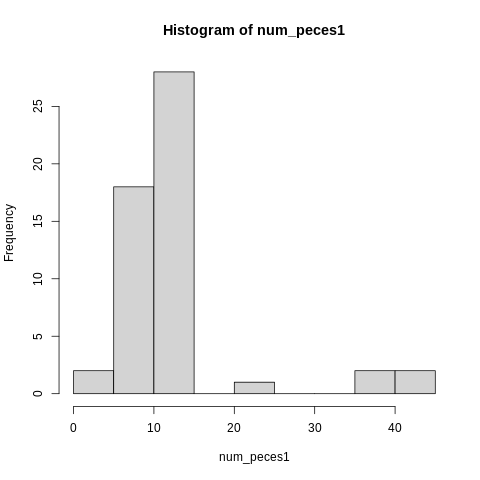

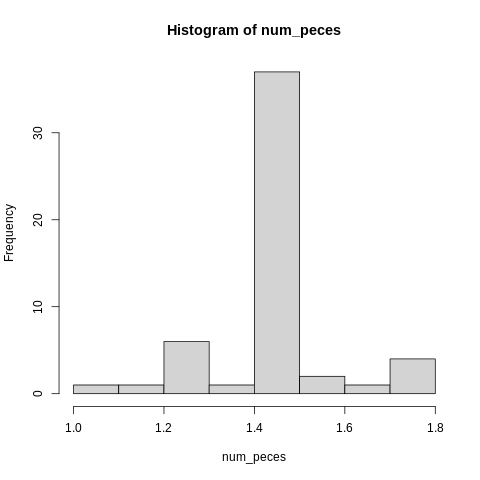

In [168]:
%%R
hist(num_peces1) 
num_peces = (num_peces1^num_pecesV-1)/num_pecesV
hist(num_peces)
ad.test(num_peces)

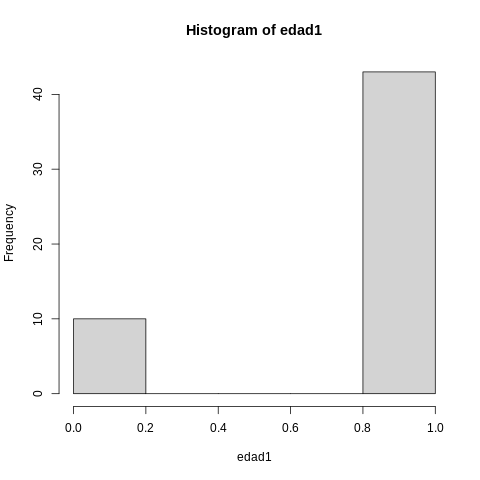

In [169]:
%%R
hist(edad1) 
edad = edad1

In [170]:
%%R
conc_mercV

[1] 0.4646465



	Anderson-Darling normality test

data:  conc_merc
A = 0.2334, p-value = 0.7864



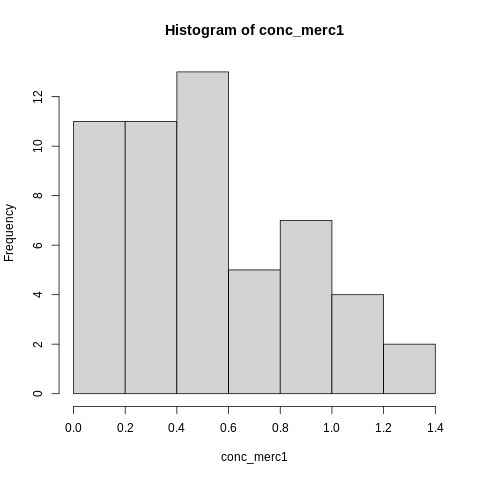

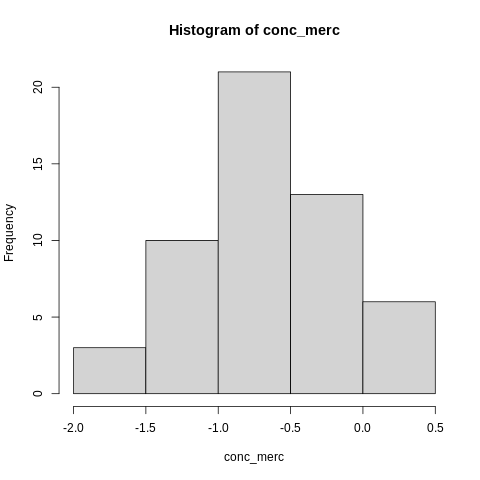

In [171]:
%%R
hist(conc_merc1) 
conc_merc = (conc_merc1^conc_mercV-1)/conc_mercV
hist(conc_merc)
ad.test(conc_merc)

In [190]:
%%R
alcalinidad = (alcalinidad-mean(alcalinidad))/sd(alcalinidad)
calcio = (calcio -mean(calcio ))/sd(calcio )
ph = (ph-mean(ph))/sd(ph)
clorofila = (clorofila-mean(clorofila))/sd(clorofila)
conc_merc = (conc_merc-mean(conc_merc))/sd(conc_merc)
num_peces = (num_peces-mean(num_peces))/sd(num_peces)
edad = (edad-mean(edad))/sd(edad)

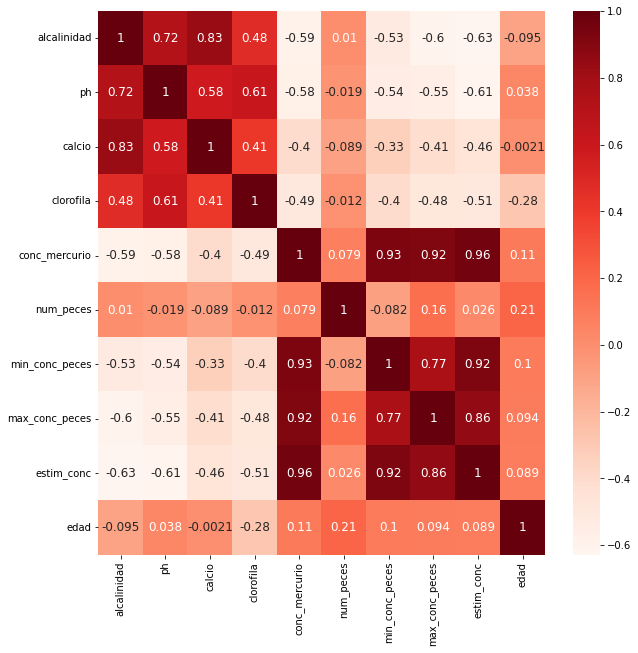

In [173]:
columns = cuantitativas+["edad"]
num_data = data[columns]
plt.figure(figsize=(10,10))
cor = num_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,annot_kws = {'fontsize':12})

**Correlaciones más fuertes**
* Hay una correlación mayor a 0.92 entre las variables mínimo de concentración de mercurio, máximo de concentración de mercurio y estimación de la concentración de mercurio en el pez de 3 años, con la variable de concentración media de mercurio, lo cual tiene sentido pues se trata de datos provenientes del mismo grupo de peces.

*   Las variables calcio y alcalindad tienen una correlación de 0.83, lo cual tiene sentido pues la alcalinidad está medida en mg por litros de carbonato de calcio.

* Las variables ph y alcalinidad tienen una correlación de 0.72, ya que se trata de medidas similares, pues el ph es una medidad de acidez o alcalinidad en el agua. 

In [174]:
%%R
library(Hmisc)


In [175]:
%%R -i data
#data$nombre_lago
df <- subset(data, select= -c(nombre_lago))

In [176]:
%%R
Rc = rcorr(as.matrix(df))
Rc

               alcalinidad    ph calcio clorofila conc_mercurio num_peces
alcalinidad           1.00  0.72   0.83      0.48         -0.59      0.01
ph                    0.72  1.00   0.58      0.61         -0.58     -0.02
calcio                0.83  0.58   1.00      0.41         -0.40     -0.09
clorofila             0.48  0.61   0.41      1.00         -0.49     -0.01
conc_mercurio        -0.59 -0.58  -0.40     -0.49          1.00      0.08
num_peces             0.01 -0.02  -0.09     -0.01          0.08      1.00
min_conc_peces       -0.53 -0.54  -0.33     -0.40          0.93     -0.08
max_conc_peces       -0.60 -0.55  -0.41     -0.48          0.92      0.16
estim_conc           -0.63 -0.61  -0.46     -0.51          0.96      0.03
edad                 -0.09  0.04   0.00     -0.28          0.11      0.21
               min_conc_peces max_conc_peces estim_conc  edad
alcalinidad             -0.53          -0.60      -0.63 -0.09
ph                      -0.54          -0.55      -0.61  0.04


$\alpha = 0.05$

**alcalinidad** 
 0.0000

$H_0: \rho = 0 $

$H_0: \rho \neq 0 $

Se rechaza la hipótesis nula si:
  * valor p < 0.05

Ya que el valor p de la alcalinidad en relación a la concentración media de mercurio es de 0.0000, se rechaza la hipótesis nula y se concluye que esta variable tiene correlación con la con concentración.



**ph** 0.0000

$H_0: \rho = 0 $

$H_0: \rho \neq 0 $

Se rechaza la hipótesis nula si:
* valor p < 0.05

Ya que el valor p del ph en relación a la concentración media de mercurio es de 0.0000, se rechaza la hipótesis nula y se concluye que esta variable  tiene correlación con la con concentración.

**calcio** 0.0029

$H_0: \rho = 0 $

$H_0: \rho \neq 0 $

Se rechaza la hipótesis nula si:
* valor p < 0.05


Ya que el valor p del calcio en relación a la concentración media de mercurio es de **0.0029**, se rechaza la hipótesis nula y se concluye que esta variable  tiene correlación con la con concentración.

**clorofila** 0.0002

$H_0: \rho = 0 $

$H_0: \rho \neq 0 $

Se rechaza la hipótesis nula si:
* valor p < 0.05

Ya que el valor p de la clorofila en relación a la concentración media de mercurio es de **0.0002**, se rechaza la hipótesis nula y se concluye que esta variable  tiene correlación con la con concentración.

**num_peces** 0.5737  
$H_0: \rho = 0 $

$H_0: \rho \neq 0 $

Se rechaza la hipótesis nula si:
* valor p < 0.05

Ya que el valor p del número de peces en relación a la concentración de mercurio es de **0.5737**, no se rechaza la hipótesis nula y se concluye que esta variable no tiene correlación con la con concentración.



**min_conc_peces**  0.0000

$H_0: \rho = 0 $

$H_0: \rho \neq 0 $

Se rechaza la hipótesis nula si:
* valor p < 0.05

Ya que el valor p del mínimo de la concentración de mercurio en relación a la concentración media de mercurio es de **0.0000**, se rechaza la hipótesis nula y se concluye que esta variable  tiene correlación con la con concentración.

**max_conc_peces**  0.0000

$H_0: \rho = 0 $

$H_0: \rho \neq 0 $

Se rechaza la hipótesis nula si:
* valor p < 0.05

Ya que el valor p del máximo de la concentración de mercurio en relación a la concentración media de mercurio es de **0.0000**, se rechaza la hipótesis nula y se concluye que esta variable tiene correlación con la con concentración.

**estim_conc**   0.0000  

$H_0: \rho = 0 $

$H_0: \rho \neq 0 $

Se rechaza la hipótesis nula si:
* valor p < 0.05

Ya que el valor p del mínimo de la concentración de mercurio en relación a la estimación de la concentración media de mercurio es de **0.0000**, se rechaza la hipótesis nula y se concluye que esta variable  tiene correlación con la con concentración.


**edad** 0.4383

$H_0: \rho = 0 $

$H_0: \rho \neq 0 $

Se rechaza la hipótesis nula si:
* valor p < 0.05

Ya que el valor p de la edad en relación a la concentración media de mercurio es de **0.4383**, no se rechaza la hipótesis nula y se concluye que esta variable no  tiene correlación con la con concentración.

# 2. Analiza los datos y pregunta base

## Modelo de regresión lineal multiple

**Variables que tienen correlación con la concentración media encontradas**


*   Alcalinidad
*   ph
*   calcio
*   colorofila
*   mínimo de la concentración de mercurio
*   máximo de la concentración de mercurio
*   estimación de la concentración de mercurio

**Variables que no tienen correlación con la concentración media encontradas**

* num_peces
* edad

Debido a que las tres ultimas variables enlistadas arriba son medidas de concentración, estas no se toman en cuenta para contestar la pregunta de investigación, dado que no son factores que influyen en el nivel de contaminación por mecrurio en los peces, sino que estos solo miden la concentración del mercurio. Sin emabrgo, encontramos que la alcalinidad, el ph, el calcio y la clorofila tienen una correlación significativa con la concentración media de mercurio, por lo que son esas las variables que se van a utilizar para el modelo.

A continuación se realiza un modelo de regresión lineal multiple, utilizando el método mixto para así conocer cuales son las variables que generan el mejor modelo para estimar la concentración media de mercurio utilizando como criterio el criterio de información de Akaike.

In [189]:
%%R
R = lm(conc_merc ~ alcalinidad + ph + calcio + clorofila)
summary(R)


Call:
lm(formula = conc_merc ~ alcalinidad + ph + calcio + clorofila)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67128 -0.23690  0.00311  0.15941  1.05926 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.64590    0.04984 -12.960  < 2e-16 ***
alcalinidad -0.39490    0.11475  -3.441  0.00121 ** 
ph          -0.02910    0.10254  -0.284  0.77782    
calcio       0.13902    0.10281   1.352  0.18264    
clorofila   -0.09588    0.06615  -1.449  0.15372    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3628 on 48 degrees of freedom
Multiple R-squared:  0.5239,	Adjusted R-squared:  0.4842 
F-statistic:  13.2 on 4 and 48 DF,  p-value: 2.5e-07



In [178]:
%%R
step(R, direction = "both", trace = 1)

Start:  AIC=-102.72
conc_merc ~ alcalinidad + ph + calcio + clorofila

              Df Sum of Sq    RSS      AIC
- ph           1   0.01060 6.3297 -104.627
- calcio       1   0.24072 6.5598 -102.734
<none>                     6.3191 -102.716
- clorofila    1   0.27658 6.5957 -102.445
- alcalinidad  1   1.55921 7.8783  -93.027

Step:  AIC=-104.63
conc_merc ~ alcalinidad + calcio + clorofila

              Df Sum of Sq    RSS      AIC
- calcio       1   0.23012 6.5598 -104.734
<none>                     6.3297 -104.627
- clorofila    1   0.39820 6.7279 -103.393
+ ph           1   0.01060 6.3191 -102.716
- alcalinidad  1   2.09494 8.4247  -91.474

Step:  AIC=-104.73
conc_merc ~ alcalinidad + clorofila

              Df Sum of Sq    RSS      AIC
<none>                     6.5598 -104.734
+ calcio       1    0.2301 6.3297 -104.627
- clorofila    1    0.3431 6.9030 -104.032
+ ph           1    0.0000 6.5598 -102.734
- alcalinidad  1    3.3256 9.8854  -84.999

Call:
lm(formula = conc_merc ~ 

Como resultado se obtiene que las variables calcio, clorofila y alcalindad son con las que se generaría el mejor modelo.

A continuación se evalua el mejor modelo analizando el coeficiente de determinación y realizando las siguientes pruebas a los residuos: normalidad, verificación de media cero, homocedasticidad.

## Verificación del modelo

$\alpha = 0.05$

In [179]:
%%R
R = lm(formula = conc_merc ~ alcalinidad + clorofila)
summary(R)


Call:
lm(formula = conc_merc ~ alcalinidad + clorofila)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6953 -0.2386 -0.0358  0.1466  1.1473 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.64590    0.04975 -12.982  < 2e-16 ***
alcalinidad -0.29883    0.05936  -5.035 6.59e-06 ***
clorofila   -0.09599    0.05936  -1.617    0.112    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3622 on 50 degrees of freedom
Multiple R-squared:  0.5057,	Adjusted R-squared:  0.486 
F-statistic: 25.58 on 2 and 50 DF,  p-value: 2.233e-08



**Coeficiente de determinación =** 0.5057

**Coeficiente de determinación ajustado =** 0.486

El coeficiente de determinación tiene un valor de 0.5057 lo cual indica que hay algo de variación explicada por el modelo, sin embargo, no es el valor más óptimo.

### Normalidad

**Hipótesis**

$H_0$: Los datos son normales

$H_1$: Los datos no son normales

**Regla de decisión**

Se rechaza $H_0$ si:
* Valor p < $\alpha$ 

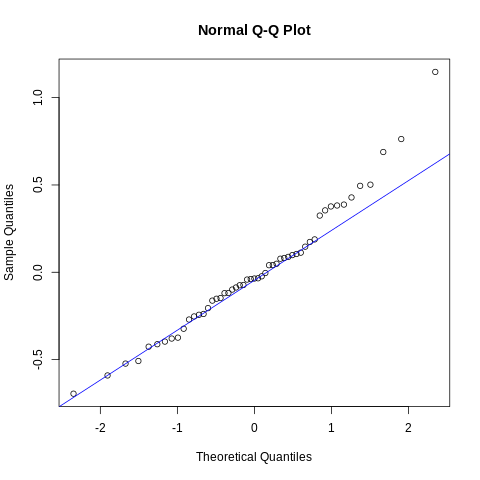

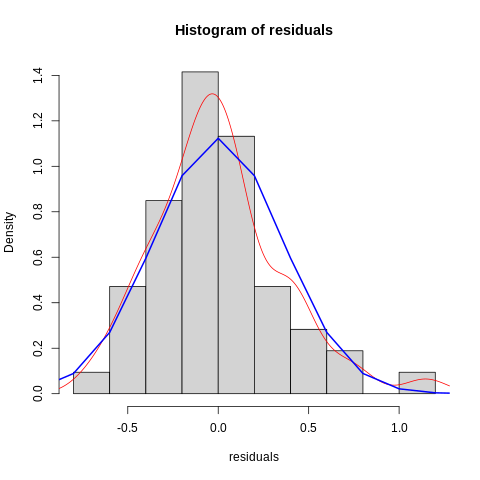

In [180]:
%%R
residuals = R$residuals
qqnorm(residuals)
qqline(residuals,col="blue")

hist(residuals,freq=FALSE)
lines(density(residuals),col="red")
curve(dnorm(x,mean=mean(residuals),sd=sd(residuals)), from=-10,to=10,add=TRUE, col="blue",lwd=2)

In [181]:
%%R
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.96719, p-value = 0.1523



**Análisis y conclusión**


* En la qqplot se observa que la mayoría de los residuos se ajustan idealmente a la linea normal.
* La forma del histograma se asemeja a una distribución normal. 
* El valor-p en la prueba de Shapiro tiene un valor de 0.1523, este es mayor a 0.05 por lo que no se rechaza la hipótesis nula.


Tomando en cuenta las observaciones, se concluye que los residuos son normales.


### Verificación de media cero

**Hipótesis**

$H_0 = 0$

$H_1 \neq 0$

**Regla de decisión**

Se rechaza H_0 si:

* Valor p < $\alpha$ 

In [182]:
%%R
t.test(residuals)


	One Sample t-test

data:  residuals
t = 3.4585e-17, df = 52, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.09789895  0.09789895
sample estimates:
  mean of x 
1.68729e-18 



**Análisis y conclusión**

El valor p es mayor a 0.05, por esta razón no se rechaza la hipótesis nula y se concluye que la media de los residuos es 0.



#### Homocedasticidad

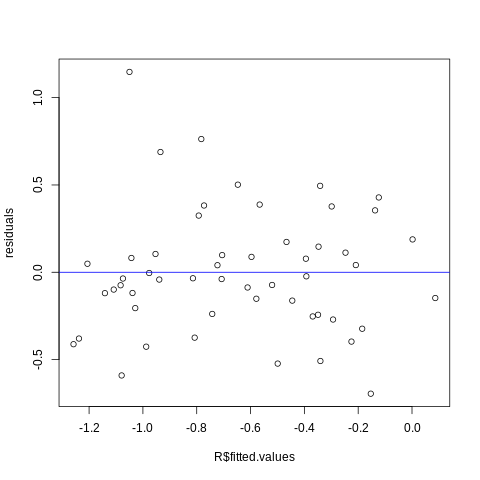

In [183]:
%%R
plot(R$fitted.values,residuals)
abline(h=0, col="blue")

Los puntos no siguen algún patrón visible y se encuentran esparcidos alrededor de la linea, por lo que parecen ser homogeneos.

#### Independencia

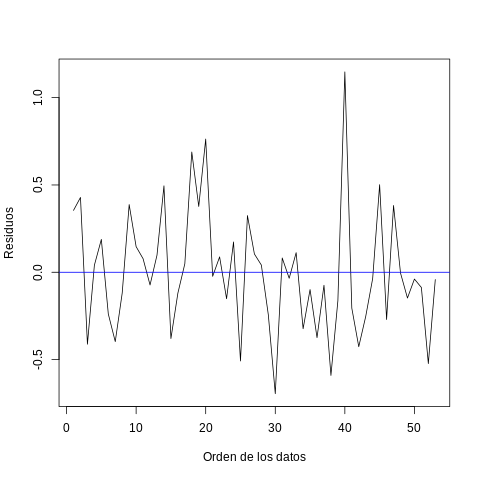

In [184]:
%%R
plot(c(1:53), R$residuals, type="l", xlab="Orden de los datos", ylab = "Residuos")
abline(h=0, col="blue")

Los datos no siguen ningún patrón y parecen acomodarse de forma aleatoria, por lo que se puede decir que son independientes.

#### Conclusión de verificación de modelo

Ya que los datos son normales, hay homocedasticidad e independencia, se concluye que este modelo es apto para la base de datos y puede ser util para predecir la concentración media de mercurio en un grupo de peces con la alcalinidad y clorofila.

## Conclusión

**¿Cuáles son los principales factores que influyen en el nivel de contaminación por mercurio en los peces de los lagos de Florida?**  
Para el realizamiento de este análisis hubo preguntas clave que ayudaron en el proceso:

* ¿Habrá diferencia significativa entre la concentración de mercurio por la edad de los peces?
Con base en la gráfica de comparación encontrada en la sección de exploración de datos en donde se compara la edad de los peces con la concentración de mercurio, así como en la correlación de ambas variables. Se encontró que la concentración media de mercurio no varía mucho dependiendo de la edad y que no hay correlación entre estas dos variables. Por lo que puede decirse que no hay diferencias significativas entre la concentración de mercurio por la edad de los peces.

* Si el muestreo se realizó lanzando una red y analizando los peces que la red encontraba ¿Habrá influencia del número de peces encontrados en la concentración de mercurio en los peces?
Con base en la gráfica de comparación encontrada en la sección de exploración de datos en donde se compara la edad de los peces con la concentración de mercurio, así como en la correlación de ambas variables. Se encontró que la concentración media de mercurio cambia con la cantidad de peces y que esta relación cambia de forma aleatoria, es decir, no se observa algún patrón o tendencia que se siga; mientras que la correlación de ambas variables es de 0.079. Por lo que según lo deducido del análisis no hay influencia del número de peces encontrados con la concentración media de mercurio en los peces.




* ¿Hay evidencia para suponer que la concentración promedio de mercurio en los lagos es dañino para la salud humana? Considera que las normativas de referencia para evaluar los niveles máximos de Hg (Reglamento 34687-MAG y los reglamentos internacionales CE 1881/2006 y Codex Standard 193-1995) establecen que la concentración promedio de mercurio en productos de la pesca no debe superar los 0.5 mg de Hg/kg.

**Hipótesis**

$H_0$: $\mu=0.5$  
$H_1$: $\mu>0.5$ 

In [185]:
%%R
alpha = 0.05
t0= 1 - qt(alpha, 52) 
cat("t0= ", t0)

t0=  2.674689

**Regla de decisión**

Rechazo $H_0$ si:

* Si |t*| > 1.644854

**Análisis**

In [191]:
%%R
m = mean(conc_merc)
sm = sd(conc_merc) / sqrt(53) 
te = 1 - (m-0.5)/sm

cat("t*=",te,"\n")

t*= 4.640055 


Debido a que t* es mayor a 1.64 se rechaza la hipótesis nula, lo que significa que la media de concentración de mercurio es mayor a 0.5.


Se concluye que la concentración promedio de mercurio en los peces, según la muestra evaluada, supera los 0.5 mg de Hg/kg. Por lo que hay evidencia para suponer que la concentración promedio de mercurio en los lagos de Florida es dañina para la salud humana.

De acuerdo al análisis anterior de los datos, tomando en cuenta los resultados de las preguntas guía, las pruebas de hipótesis sobre la correlación de las variables con la concentración media de mercurio, así como las variables que resultaron ser mejores en la regresión lineal, se concluye que los principales factores que influyen en el nivel de contaminación por mercurio en los peces de los lagos de Florida son los valores del calcio, clorofila y alcalinidad